<img src="https://www.galileo.edu/wp-content/uploads/2010/12/logo-ug.png" width="200px">
<h3>Instituto de Investigación de operaciones</h3>
<h3>Posgrado en Análisis y Predicción de Datos</h3>
<h3><b>Ciencia de Datos con Python</b></h3>
<h4><b>Profesor: Ing. Preng Biba</b></h4>

<h4><b>Desarrollado por: Javier Navarro - 20015565</b></h4>


<h1>Proyecto</h1>

## 1. Crear un entorno de anaconda con los paquetes que considere necesarios.
Tras haber creado el entorno en anaconda instalando los modulos necesarios, procedemos a importar las librerias
autorizadas para el proyecto

In [37]:
import seaborn as sb
import sklearn as sc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

## 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento (80%) y validación y pruebas (20 %).


In [18]:
# Cargamos el arreglo que se encuentra en formato binario de numpy a un arreglo ordinario de numpy
data = np.load("proyecto_data/proyecto_training_data.npy")
# Luego vamos a definir cual es el equivalente en cantidad de filas al 80% y 20% de datos respectivamente
data_count = len(data)
train_data_count = int(data_count * 0.8)
test_data_count = int(data_count * 0.2)
train_data = data[:train_data_count]
test_data = data[:test_data_count]

## 3. Análisis exploratorio de datos: para cada variable en el dataset calcular:
- media
- valor máximo
- valor mínimo
- rango
- desviación estándar

In [35]:
def pretty(d, indent=0):
    """
    Para imprimir el diccionario bonito.
    :param d: diccionario
    :param indent: indentación inicial
    :return: cadena de texto con diccionario enbellecido
    """
    result = ''
    for key, value in d.items():
        result += '\t' * indent + str(key)
        if isinstance(value, dict):
            result += '\n' + pretty(value, indent + 1) + '\n'
        else:
            result += '\t' * (indent + 1) + str(value) + '\n'
    return result

def exploratory_analysis(nombre):
    """
    Para realizar analisis exploratorio a una variable
    :param nombre: nombre de la variable
    :return: diccionario con los campos solicitados
    """
    return {
        'Media': np.mean(df[nombre]),
        'Max': np.max(df[nombre]),
        'Min': np.min(df[nombre]),
        'Rango': np.ptp(df[nombre], axis = 0),
        'DesEst': np.std(df[nombre])
    }


columns = ['SalePrice','OverallQual','FstFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
df = pd.DataFrame(data = data, columns = columns)
print('Realizando análisis exploratorio para las variables')
for c in columns:
    print('-------- ' + c + ' --------')
    print(pretty(exploratory_analysis(c)))

Realizando análisis exploratorio para las variables
-------- SalePrice --------
Media	180921.19589041095
Max	755000.0
Min	34900.0
Rango	720100.0
DesEst	79415.29188606751

-------- OverallQual --------
Media	6.0993150684931505
Max	10.0
Min	1.0
Rango	9.0
DesEst	1.3825228366585953

-------- FstFlrSF --------
Media	1162.626712328767
Max	4692.0
Min	334.0
Rango	4358.0
DesEst	386.45532230228963

-------- TotRmsAbvGrd --------
Media	6.517808219178082
Max	14.0
Min	2.0
Rango	12.0
DesEst	1.624836553698191

-------- YearBuilt --------
Media	1971.267808219178
Max	2010.0
Min	1872.0
Rango	138.0
DesEst	30.192558810489448

-------- LotFrontage --------
Media	70.04995836802665
Max	313.0
Min	21.0
Rango	nan
DesEst	24.27463944767604



## 4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

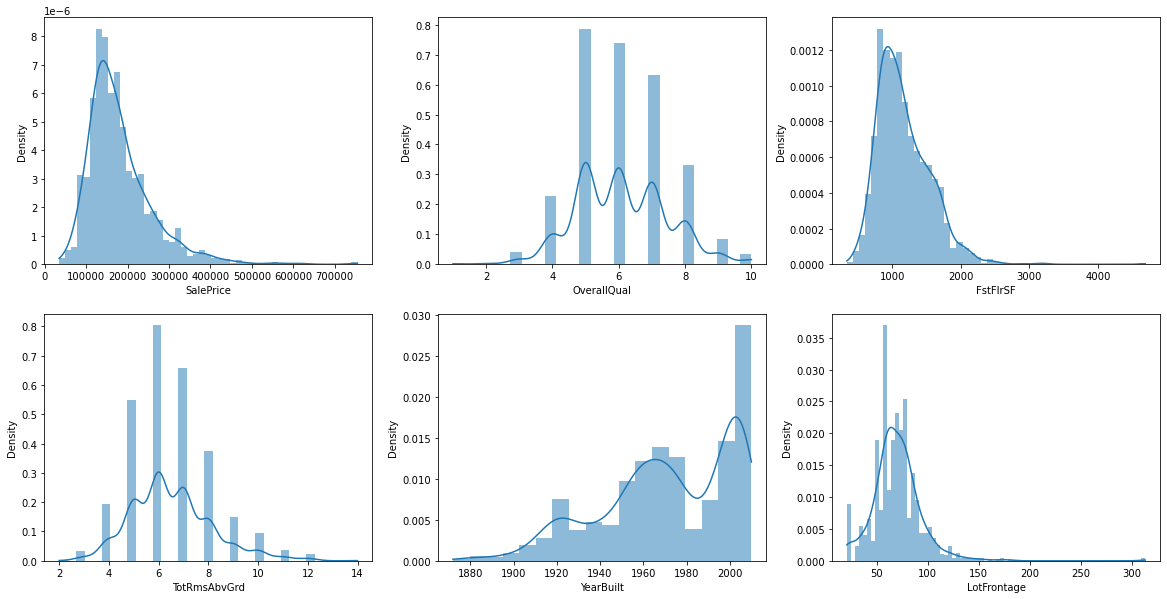

In [43]:

axes = plt.subplots(2, 3, figsize = (20, 10))[1]
sb.histplot(df["SalePrice"], ax = axes[0, 0], kde = True, stat = "density", linewidth = 0)
sb.histplot(df["OverallQual"], ax = axes[0, 1], kde = True, stat = "density", linewidth = 0)
sb.histplot(df["FstFlrSF"], ax = axes[0, 2], kde = True, stat = "density", linewidth = 0)
sb.histplot(df["TotRmsAbvGrd"], ax = axes[1, 0], kde = True, stat = "density", linewidth = 0)
sb.histplot(df["YearBuilt"], ax = axes[1, 1], kde = True, stat = "density", linewidth = 0)
sb.histplot(df["LotFrontage"], ax = axes[1, 2], kde = True, stat = "density", linewidth = 0)